<a href="https://colab.research.google.com/github/Ashish-Tripathy/ComputerVision/blob/master/Asg_4_DNN_3rd_Iteration.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Architectural Highlights of this Iteration
1. For the 3rd iteration, batch normalisation will be introduced for each convolution layer. Batch normalisation will normalise the features being extracted in the convolution layers.
2. To reduce the overfitting even further and to give more room for our model to perform even better, i will also like to introduce a dropout layer before the final 1x1 layer. I will keep the dropout rate = 0.1 as a default to start with.


# **Import Libraries and modules**

In [0]:
import keras

In [0]:
import numpy as np

from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten, Add
from keras.layers import Convolution2D, MaxPooling2D
from keras.utils import np_utils

from keras.datasets import mnist

### Load pre-shuffled MNIST data into train and test sets

In [0]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

(60000, 28, 28)


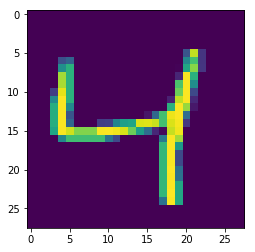

In [0]:
print (X_train.shape)
from matplotlib import pyplot as plt
%matplotlib inline
plt.imshow(X_train[2])

In [0]:
X_train = X_train.reshape(X_train.shape[0], 28, 28,1)
X_test = X_test.reshape(X_test.shape[0], 28, 28,1)

In [0]:
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255

In [0]:
y_train[:10]

array([5, 0, 4, 1, 9, 2, 1, 3, 1, 4], dtype=uint8)

In [0]:
# Convert 1-dimensional class arrays to 10-dimensional class matrices
Y_train = np_utils.to_categorical(y_train, 10)
Y_test = np_utils.to_categorical(y_test, 10)

In [0]:
Y_train[:10]


array([[0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.]], dtype=float32)

# Building the Architecture

In [0]:
from keras.models import Model
from keras.layers import Input,Conv2D, BatchNormalization,Activation, Flatten

input = Input(shape=(28, 28, 1,))

#defining convolution block
def conv_block(inputs, filters,padding = 'valid'):
  conv = Conv2D(filters = filters, kernel_size = (3,3), padding=padding, use_bias=False)(inputs)
  #conv = Dropout(0.1)(conv)
  conv = BatchNormalization()(conv)
  conv = Activation('relu')(conv)
  return conv

#defining transition block
def bottleneck(inputs,filters):
  conv = Conv2D(filters = filters, kernel_size = (1,1), padding = 'valid', use_bias = False)(inputs)
  #conv = Dropout(0.1)(conv)
  conv = BatchNormalization()(conv)
  conv = Activation('relu')(conv)
  return MaxPooling2D()(conv)

#Building the architecture
First_Layer  =  conv_block(input, 8) #26 RF 3x3
Second_Layer =  conv_block(First_Layer,12) #24 RF 5x5
Third_Layer  =  conv_block(Second_Layer,16) #22 RF 5x5
Transition_1 =  bottleneck(Third_Layer,12) #11 RF 7x7
Fourth_Layer =  conv_block(Transition_1,16) #9 RF 14x14
Fifth_Layer  =  conv_block(Fourth_Layer,32)  #7 RF 16x16 
dropout      =  Dropout(0.1)(Fifth_Layer) #dropout
last1x1      =  Conv2D(filters = 10, kernel_size = (1,1), padding = 'valid', use_bias = False)(Fifth_Layer)
last1x1      =  Activation('relu')(last1x1)
last_layer   =  Conv2D(filters = 10, kernel_size = (7,7), padding = 'valid', use_bias = False)(last1x1) #1; RF 22x22
last_layer   =  BatchNormalization()(last_layer)

flatten      =  Flatten()(last_layer)
output       =  Activation('softmax')(flatten)

#creating the model
model = Model(inputs=[input], outputs=[output])
model.summary()





_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         (None, 28, 28, 1)         0         
_________________________________________________________________
conv2d_17 (Conv2D)           (None, 26, 26, 8)         72        
_________________________________________________________________
batch_normalization_15 (Batc (None, 26, 26, 8)         32        
_________________________________________________________________
activation_17 (Activation)   (None, 26, 26, 8)         0         
_________________________________________________________________
conv2d_18 (Conv2D)           (None, 24, 24, 12)        864       
_________________________________________________________________
batch_normalization_16 (Batc (None, 24, 24, 12)        48        
_________________________________________________________________
activation_18 (Activation)   (None, 24, 24, 12)        0         
__________

In [19]:
from keras.callbacks import *

model.compile(loss='categorical_crossentropy',
             optimizer='adam',
             metrics=['accuracy'])

model.fit(X_train, Y_train, validation_data=(X_test, Y_test), nb_epoch = 20, verbose = 1)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  import sys


Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 19s 322us/step - loss: 0.3802 - acc: 0.9355 - val_loss: 0.1031 - val_acc: 0.9857
Epoch 2/20
60000/60000 [==============================] - 18s 298us/step - loss: 0.1438 - acc: 0.9725 - val_loss: 0.0546 - val_acc: 0.9894
Epoch 3/20
60000/60000 [==============================] - 18s 299us/step - loss: 0.0955 - acc: 0.9798 - val_loss: 0.0460 - val_acc: 0.9900
Epoch 4/20
60000/60000 [==============================] - 19s 316us/step - loss: 0.0755 - acc: 0.9831 - val_loss: 0.0389 - val_acc: 0.9912
Epoch 5/20
60000/60000 [==============================] - 18s 303us/step - loss: 0.0580 - acc: 0.9868 - val_loss: 0.0346 - val_acc: 0.9907
Epoch 6/20
60000/60000 [==============================] - 18s 300us/step - loss: 0.0524 - acc: 0.9876 - val_loss: 0.0296 - val_acc: 0.9923
Epoch 7/20
60000/60000 [==============================] - 21s 349us/step - loss: 0.0446 - acc: 0.9893 - val_loss: 0.

# Observations
1. <b>Best Validation Accuracy: 99.37% at 18th Epoch; Parameters: 14.8K; </b>
2. With the changes in this iteration we are able to achieve much better accuracy with almost the same number of parameters. Some extra parameters are added due to batch normalisations
3. The time per epoch increases a little compared to initial iterations due to extra operation of normalising after each convolution
4. The dropout increases underfitting even more for initial layers and as training accuracy increases we see the model generalises even better helping us to achieve much better accuracy. If run for more epochs we would have achieved the required accuracy. We will aim to achieve better accuracy within lesser epochs in the next iteration

